In [77]:
from scipy import fftpack
import numpy as np
import imageio
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

imgContrast = 0.08
gratingContrast = 0.8
image1 = imageio.imread('image.jpeg',as_gray=True)

#convert image to numpy array
image1_np=np.array(image1)

#fft of image
fft1 = fftpack.fftshift(fftpack.fft2(image1_np))

#Create a low pass filter image
x,y = image1_np.shape[0],image1_np.shape[1]
#size of circle
e_x,e_y=300,300
#create a box 
bbox=((x/2)-(e_x/2),(y/2)-(e_y/2),(x/2)+(e_x/2),(y/2)+(e_y/2))

low_pass=Image.new("L",(image1_np.shape[0],image1_np.shape[1]),color=0)

draw1=ImageDraw.Draw(low_pass)
draw1.ellipse(bbox, fill=1)

low_pass_np=np.array(low_pass)

#multiply both the images
filtered=np.multiply(fft1,low_pass_np)

#inverse fft
ifft2 = np.real(fftpack.ifft2(fftpack.ifftshift(filtered)))

#make a grating
x = np.arange(0, image1_np.shape[1], 1)
a = 255
f = 1

sin1d   = a*np.sin(f*x)
grating=np.tile(sin1d[np.newaxis,:],(image1_np.shape[0],1))

ifft2 = 255-np.maximum(0, np.minimum(ifft2*imgContrast+grating*gratingContrast, 255))

#save the image
imageio.imsave('fft-then-ifft.png', ifft2.astype(np .uint8))

In [55]:
x = np.arange(0, image1_np.shape[1], 1)
a = 100
f = 1
sin1d   = a*np.sin(f*x)
sin1d

array([  0.        ,  84.14709848,  90.92974268, ...,  -5.31738925,
       -86.90105055, -88.58828674])

In [56]:
grating=np.tile(sin1d[np.newaxis,:],(image1_np.shape[0],1))

In [57]:
grating.shape

(1200, 1200)

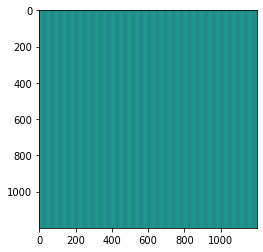

In [58]:
import matplotlib.pyplot as plt
plt.imshow(grating)